In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
df = pd.read_csv('movie_metadata.csv')

In [5]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df.dropna(inplace=True)

[(0.0, 10.0)]

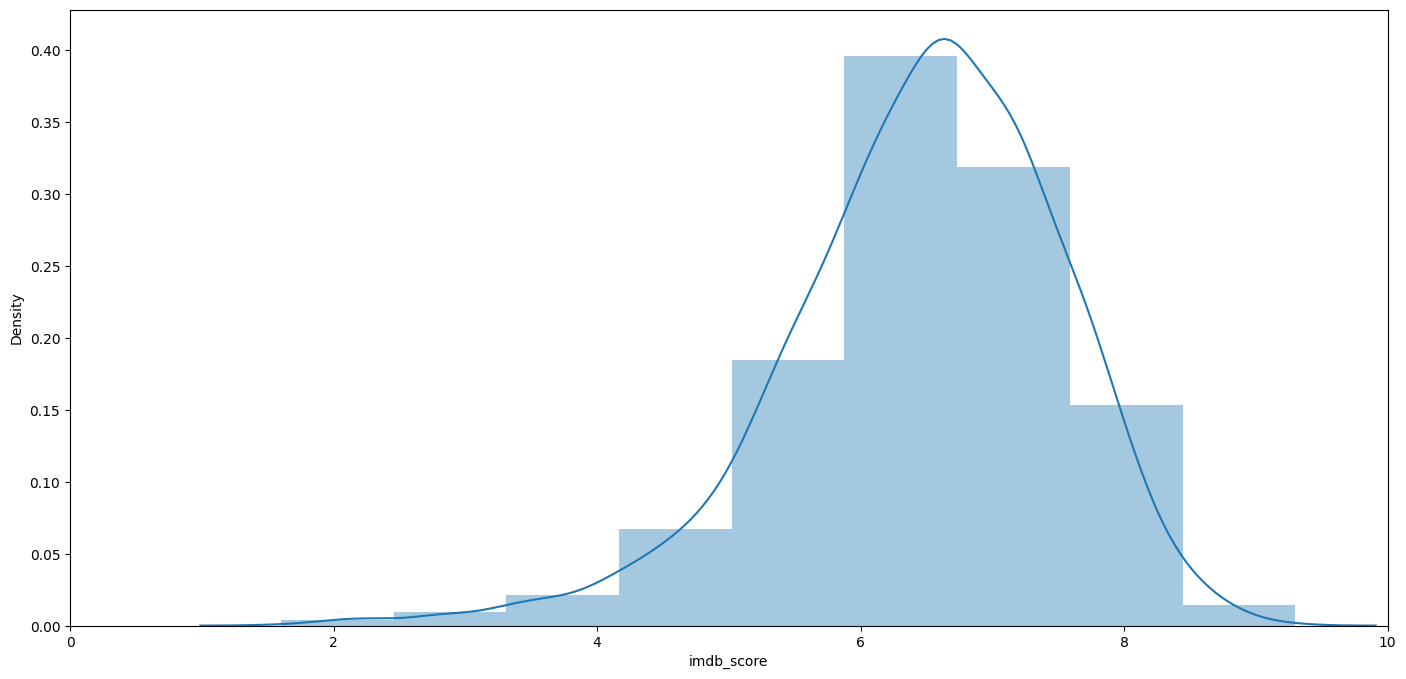

In [7]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9,)
ax.set(xlim=(0, 10))

In [8]:
#Selecting only relevant features
print(df.columns)
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]
print(movie_ratings.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')


In [9]:
movie_ratings = movie_ratings.dropna()

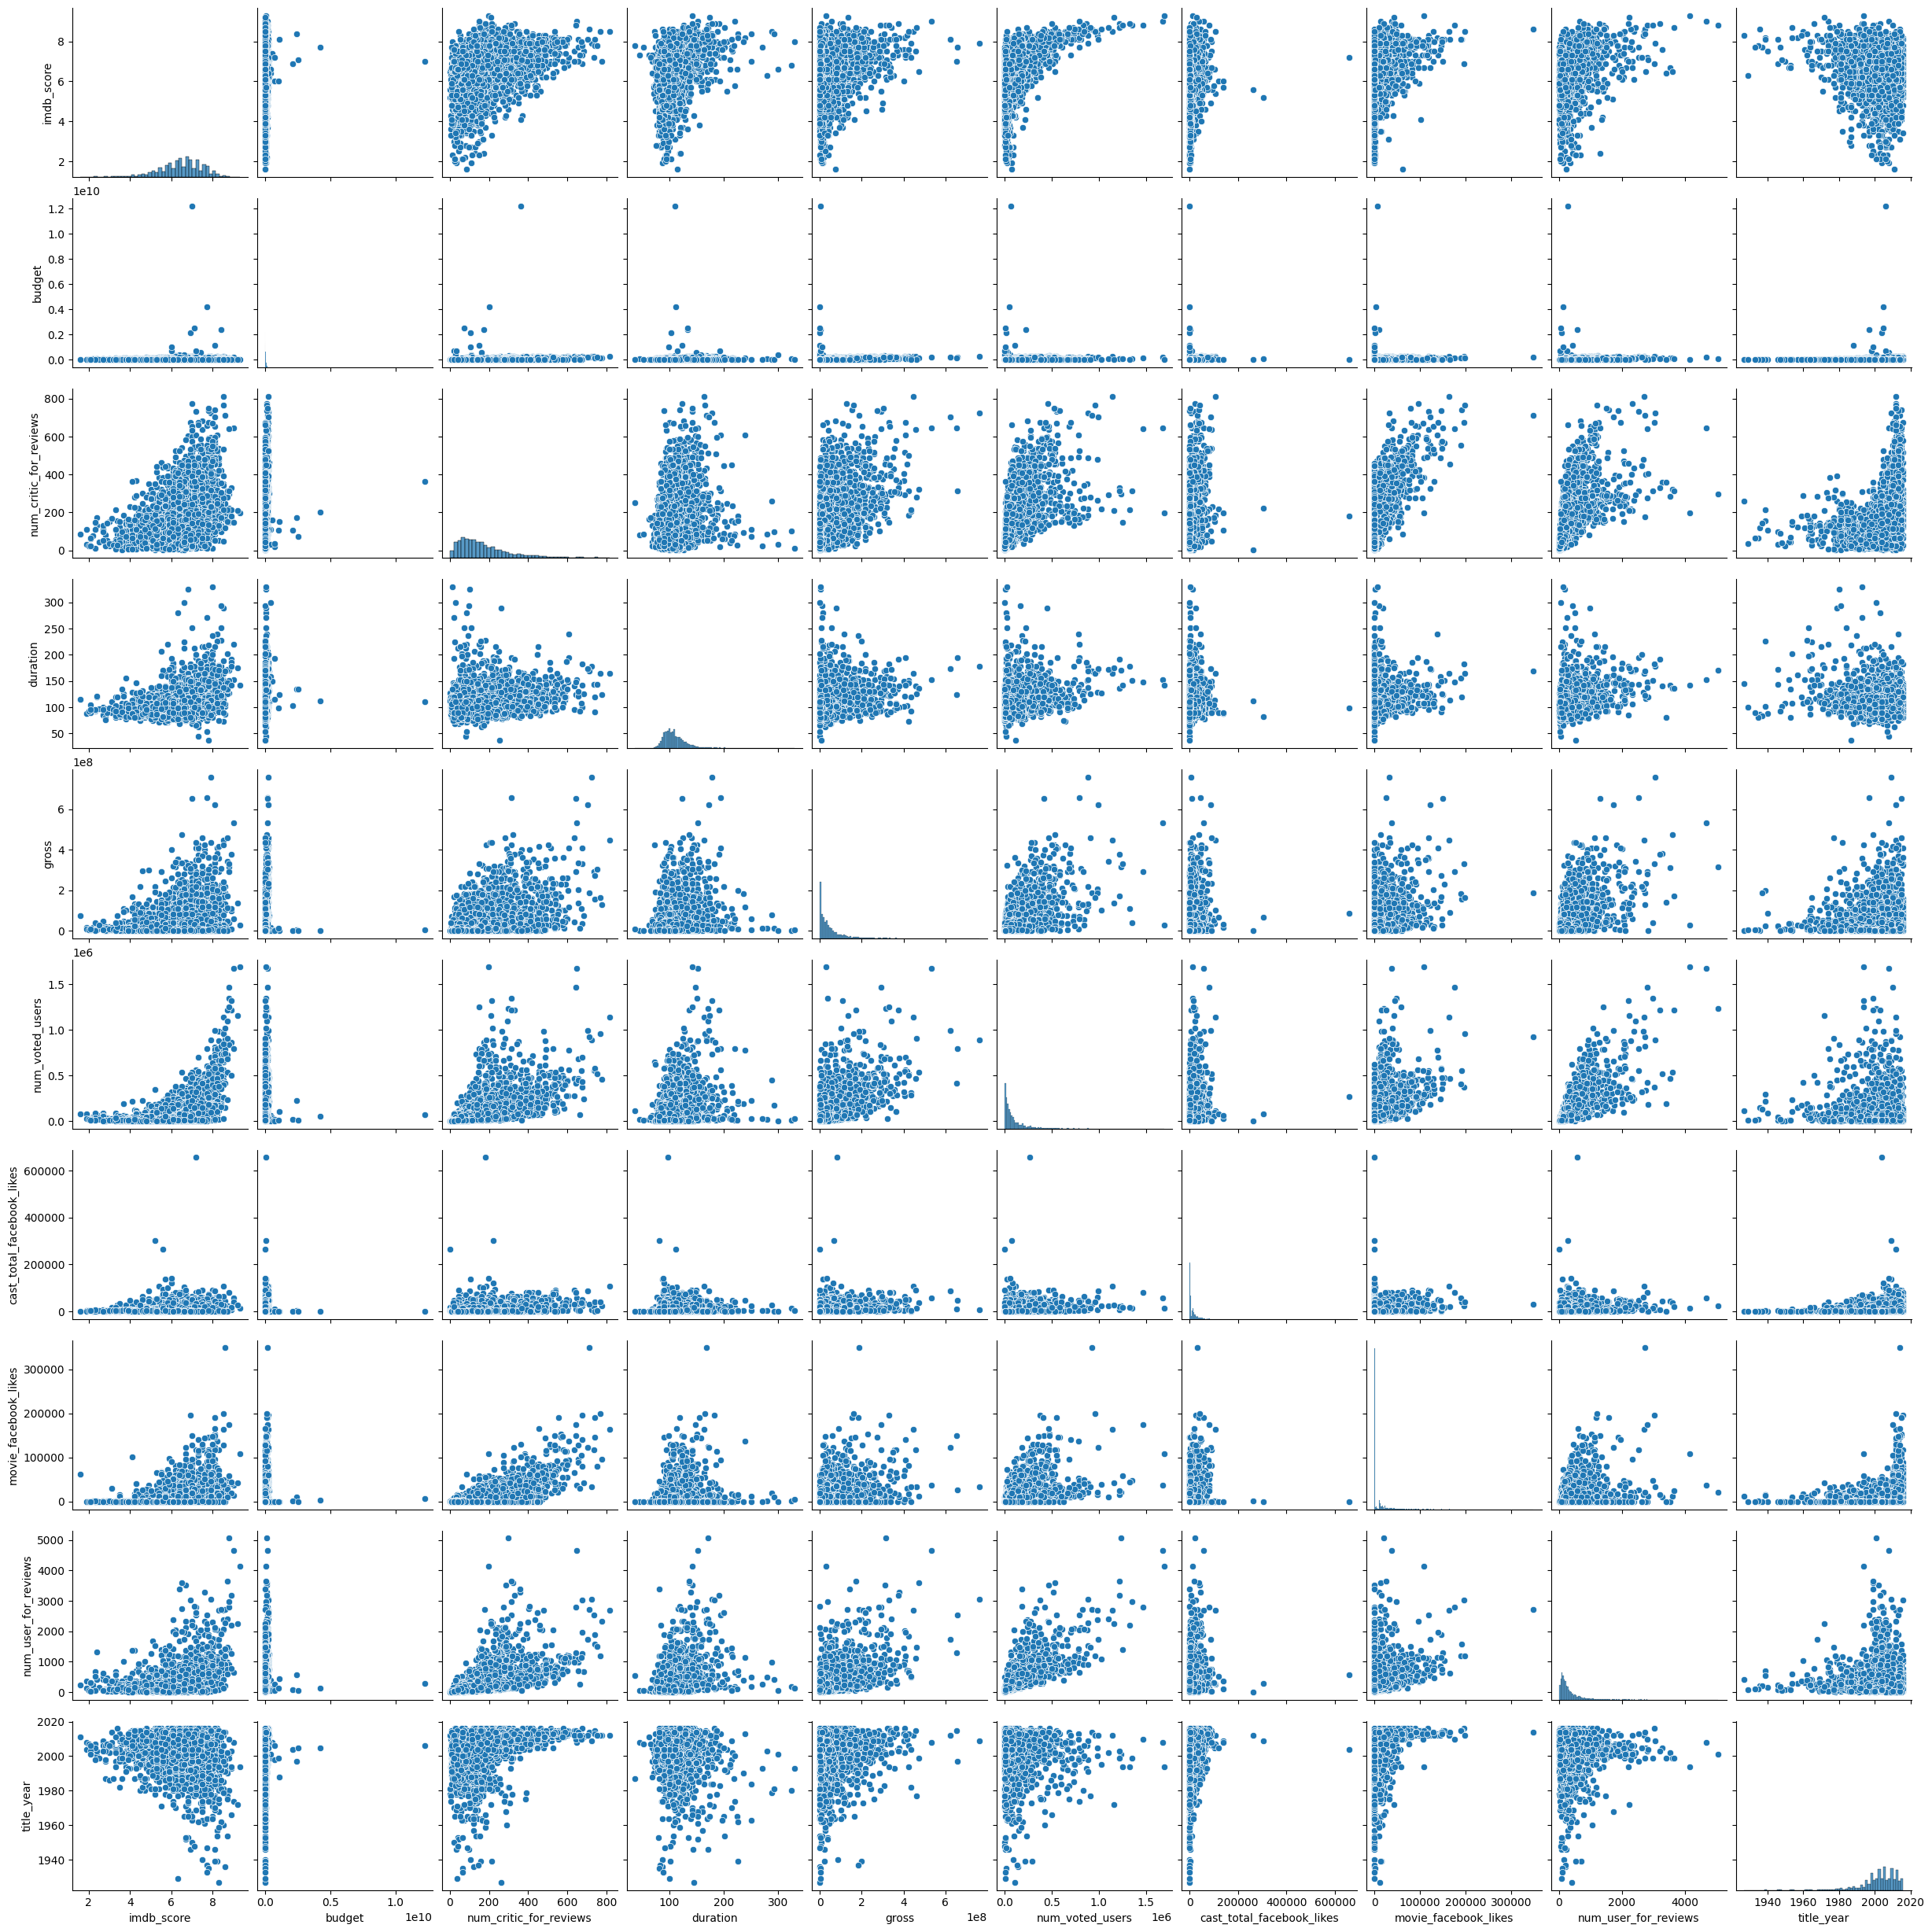

In [10]:
#Pairplot to see correlation of features
sns.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

Text(0.5, 1.0, 'imdb rating vs budget')

<Figure size 200x200 with 0 Axes>

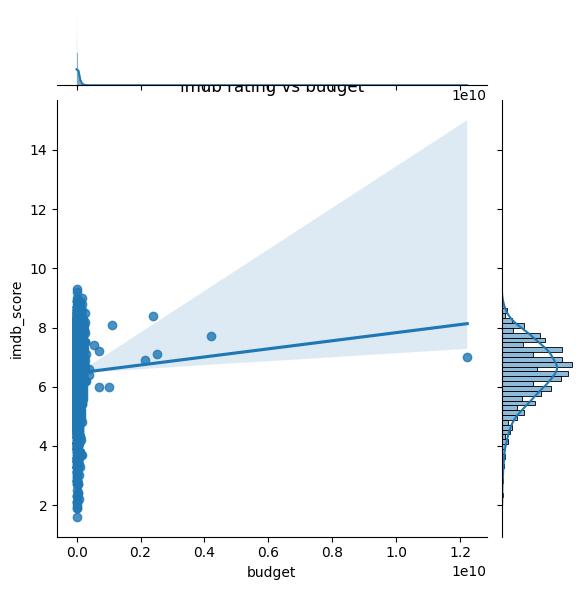

In [12]:
#Jointplot to check how rating is related to various features
#rating vs budget
sns.jointplot(x='budget', y='imdb_score', data=movie_ratings, kind='reg')
plt.xlabel('budget')
plt.ylabel('imdb_score')

Text(0.5, 1.0, 'imdb rating vs gross')

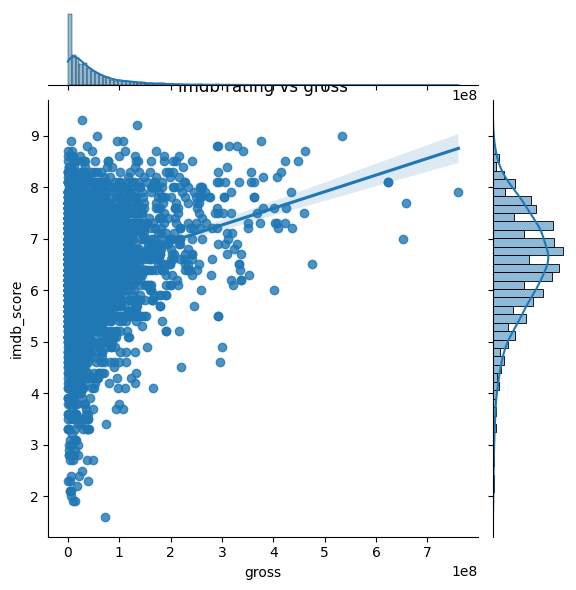

In [15]:
#rating vs gross
sns.jointplot(x='gross', y='imdb_score', data=movie_ratings, kind='reg')
plt.xlabel('gross')
plt.ylabel('imdb_score')
plt.title('imdb rating vs gross')

Text(0.5, 1.0, 'imdb rating vs num_critic_for_reviews')

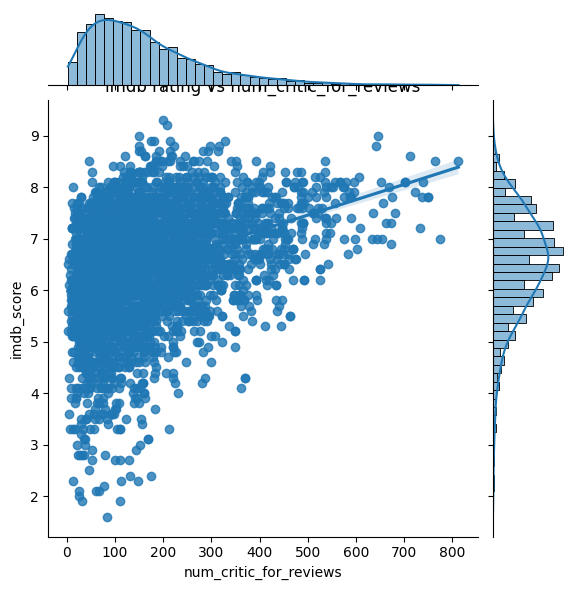

In [17]:
#rating vs number of critic reviews
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=movie_ratings, kind='reg')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_critic_for_reviews')

Text(0.5, 1.0, 'imdb rating vs duration')

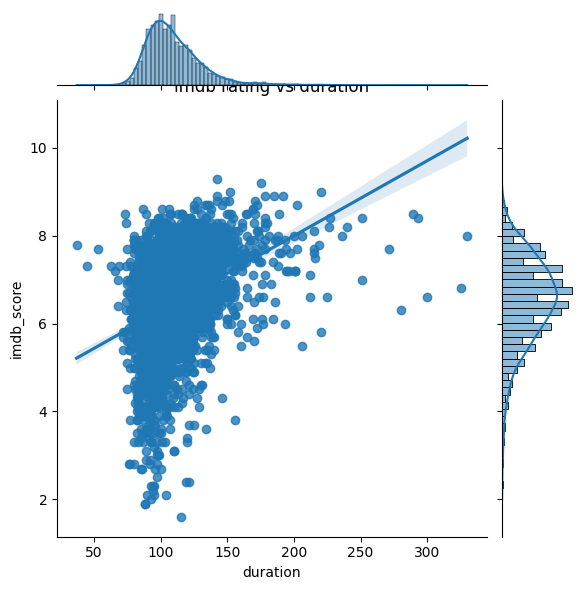

In [18]:
#rating vs duration
sns.jointplot(x='duration', y='imdb_score', data=movie_ratings, kind='reg')
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('imdb rating vs duration')

Text(0.5, 1.0, 'imdb rating vs num_user_for_reviews')

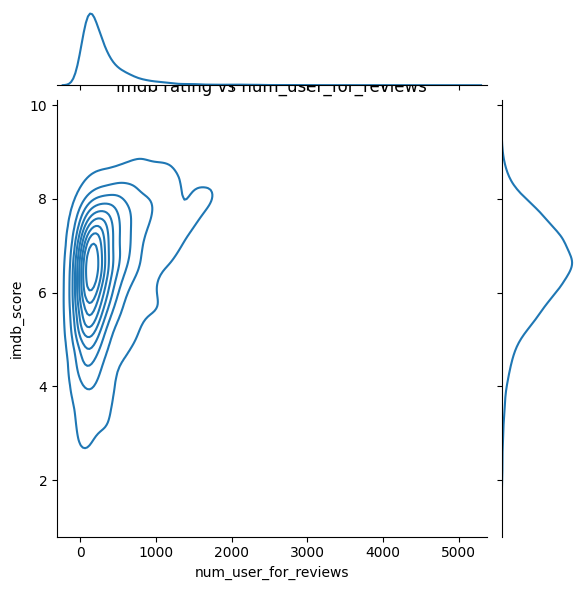

In [19]:
#rating vs number of user reviews
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=movie_ratings, kind='kde', size=10)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_user_for_reviews')

Text(0.5, 1.0, 'imdb rating vs title_year')

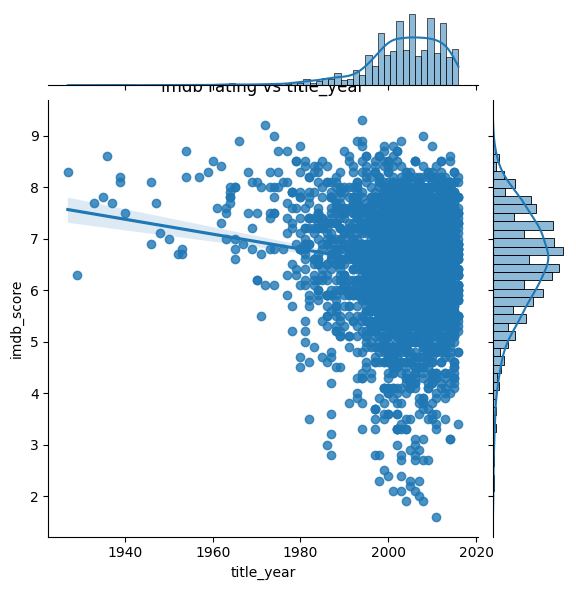

In [21]:
#rating vs year
sns.jointplot(x='title_year', y='imdb_score', data=movie_ratings, kind='reg')
plt.xlabel('title_year')
plt.ylabel('imdb_score')
plt.title('imdb rating vs title_year')

#### It is observed that the following features have minimal impact on 'movie rating' attribute. We can drop them.
'movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords','actor_3_name','movie_imdb_link','aspect_ratio','language'


In [17]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

### Label Encoding

In [18]:
df.columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

In [19]:
df['country']=le.fit_transform(df['country'].values)

### Splitting dataset

In [20]:
y=df['imdb_score'].values
x=df.loc[:, df.columns != 'imdb_score'].values

In [21]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1394                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1424                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1001   
1                       563.0                  1000.0          1591   
2                         0.0                   161.0          1794   
3

## Predictive model for movie rating - 

In [22]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

#### Random Forest

In [23]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(X_train,Y_trian)
predictions = rf.predict(X_test)
errors = abs(predictions - Y_test)

In [24]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.51 degrees.


In [25]:
# Calculate mean absolute percentage error 
mape = 100 * (errors / Y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Accuracy: 91.2 %.


(0.0, 10.0)

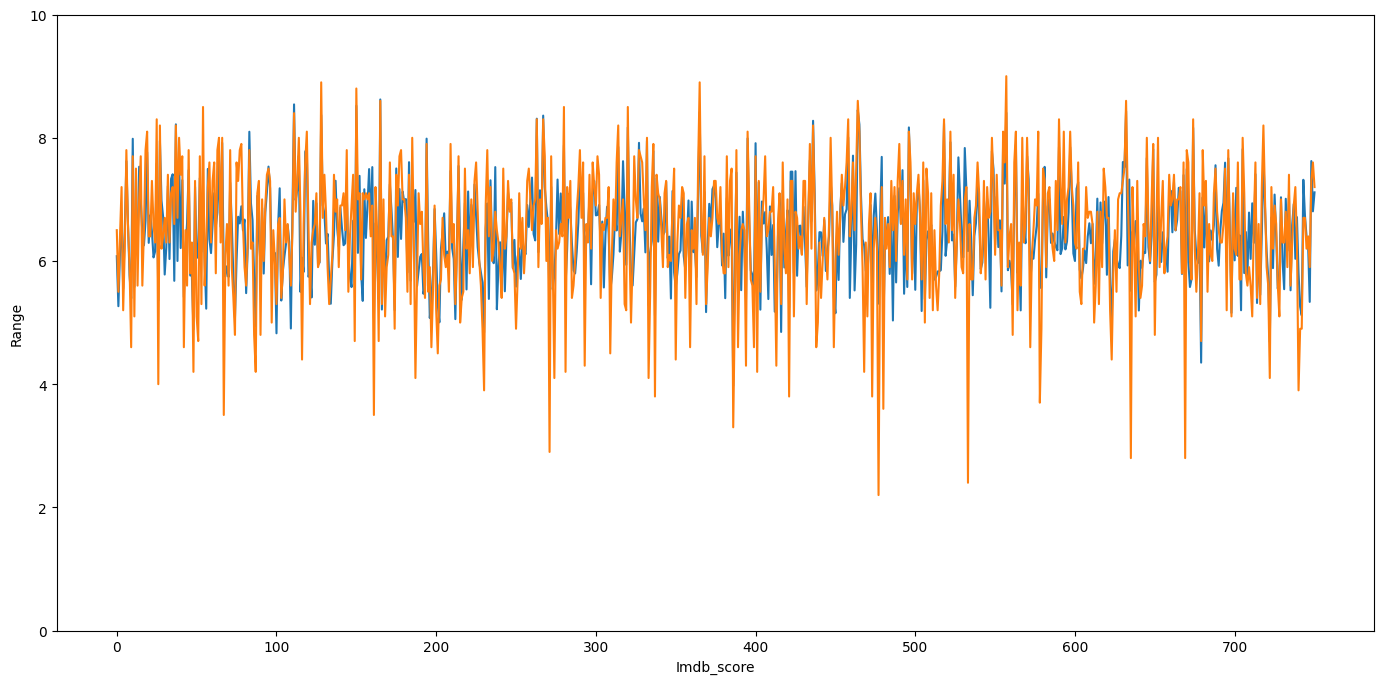

In [26]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Decision Tree

In [35]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_trian)
pred = dt.predict(X_test)
errors = abs(pred - Y_test)

In [36]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.71 degrees.


In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Accuracy: 88.11 %.


(0.0, 10.0)

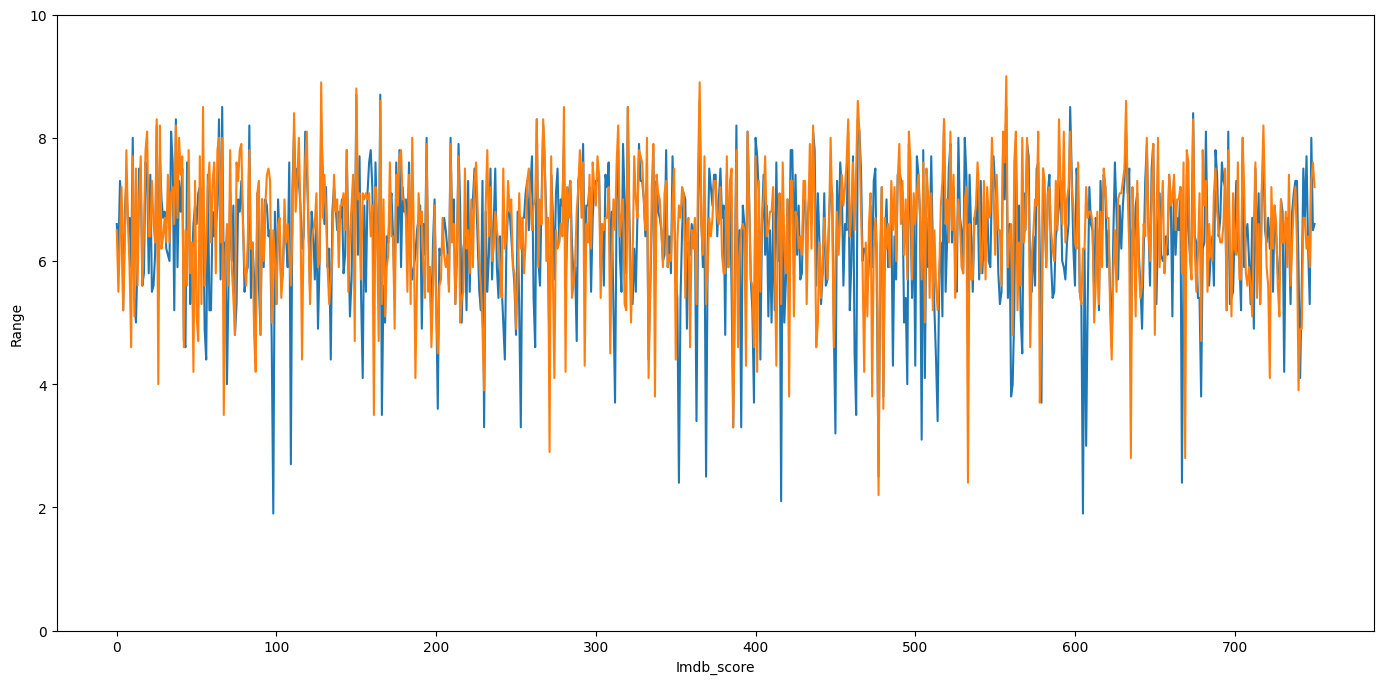

In [38]:
plt.figure(figsize=(17,8))
plt.plot(pred)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Support Vector Machine

In [39]:
svm=SVR()
svm.fit(X_train,Y_trian)
predictions = svm.predict(X_test)


In [40]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Mean Absolute Error: 0.75 degrees.
Accuracy: 86.85 %.


(0.0, 10.0)

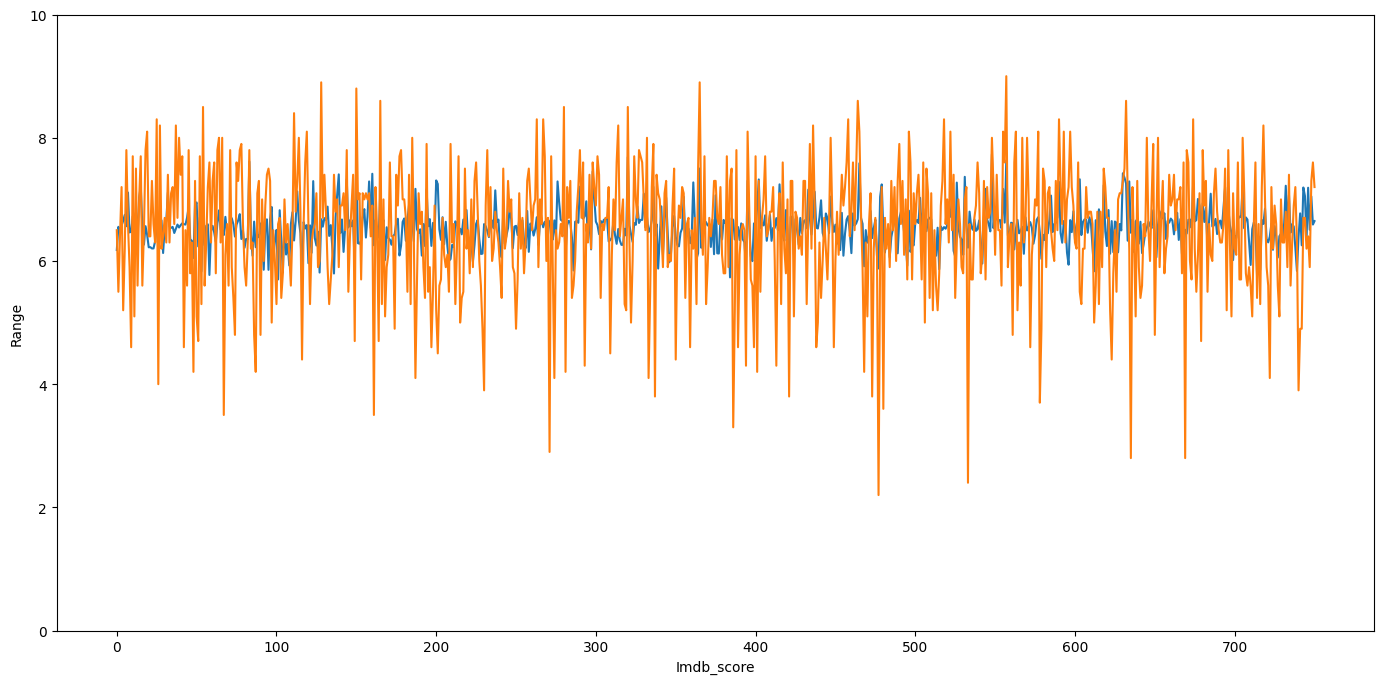

In [41]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### XG Boost

In [48]:
from xgboost import XGBRegressor

In [49]:
xgboost=XGBRegressor(n_estimators=50)

In [50]:
xgboost.fit(X_train,Y_trian)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
predictions=xgboost.predict(X_test)

In [52]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.47 degrees.
Accuracy: 91.77 %.


(0.0, 10.0)

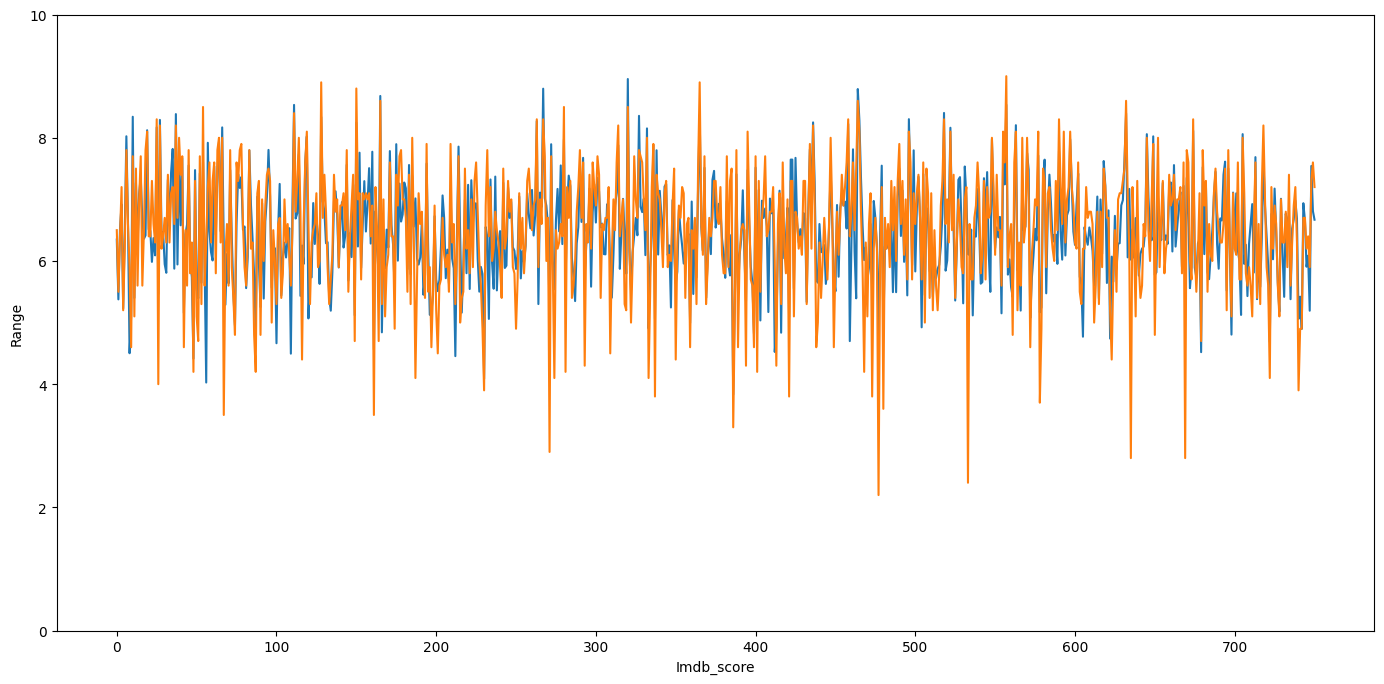

In [53]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

### I would chose random forest model for the production as it has the least mean abs error. XG boost performance is similar to that of random forest but still it didnot achieve same accuracy.

In [54]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 167425 (654.00 KB)
Trainable params: 167425 (654.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.fit(X_train, Y_trian, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
76/76 [==============================] - 1s 3ms/step - loss: 46726.0977 - mean_absolute_error: 46726.0977 - val_loss: 33270.9766 - val_mean_absolute_error: 33270.9766
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 7597.3281 - mean_absolute_error: 7597.3281 - val_loss: 2824.2466 - val_mean_absolute_error: 2824.2466
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 2602.8596 - mean_absolute_error: 2602.8596 - val_loss: 4713.9004 - val_mean_absolute_error: 4713.9004
Epoch 4/500
76/76 [==============================] - 0s 2ms/step - loss: 2052.9109 - mean_absolute_error: 2052.9109 - val_loss: 3923.4209 - val_mean_absolute_error: 3923.4209
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 1359.5701 - mean_absolute_error: 1359.5701 - val_loss: 2950.7119 - val_mean_absolute_error: 2950.7119
Epoch 6/500
76/76 [==============================] - 0s 3ms/step - loss: 1739.6089 - mean_absolute_error: 1739.6089 - val

In [56]:
predictions = model.predict(X_test)

24/24 [==============================] - 0s 630us/step


In [57]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.8 degrees.
Accuracy: 86.05 %.


(0.0, 10.0)

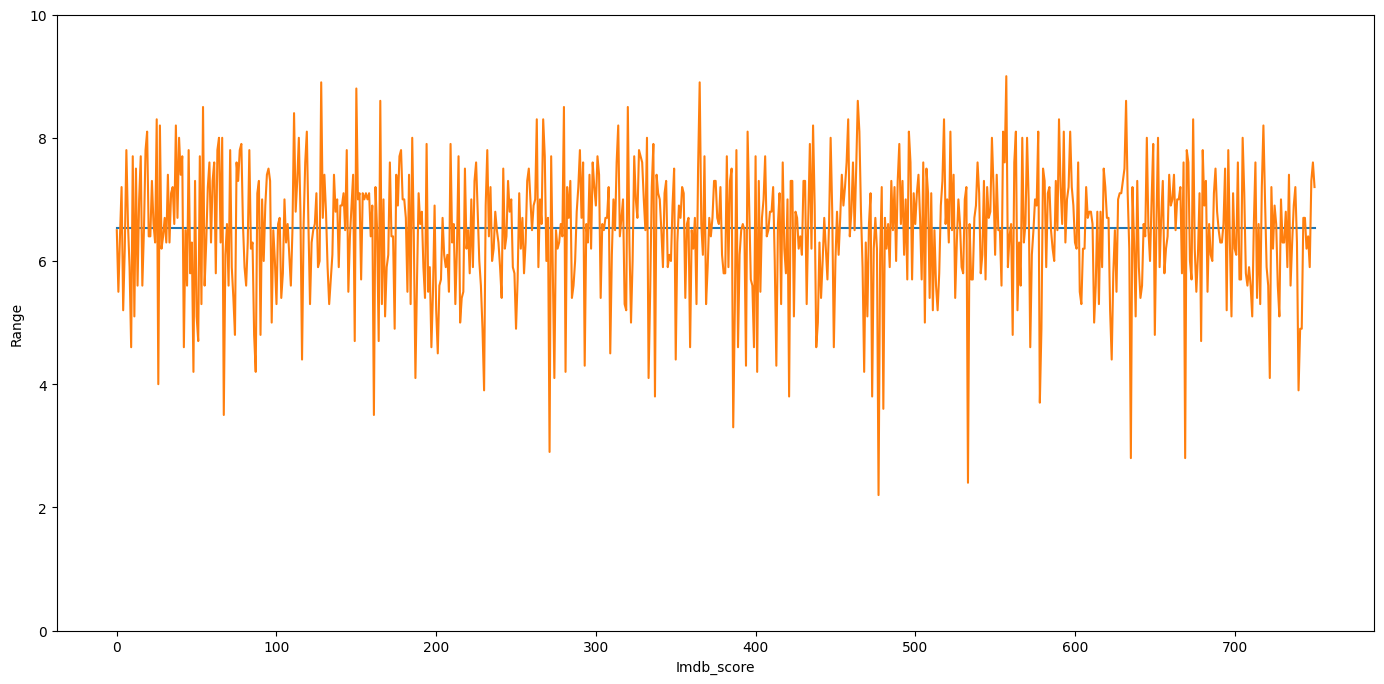

In [58]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

In [ ]:
#Results of all models - 

